# Noise Reduction Workshopping

## PDF to PNG Conversion
First, need to convert PDFs to images 
https://towardsdatascience.com/convert-pdf-to-image-in-python-using-pymupdf-9cc8f602525b

In [2]:
import glob, sys, fitz

# To get better resolution
zoom_x = 2.0  # horizontal zoom
zoom_y = 2.0  # vertical zoom
mat = fitz.Matrix(zoom_x, zoom_y)  # zoom factor 2 in each dimension

path = '../cc_sandbox/'
all_files = glob.glob(path + "*.pdf")

In [8]:
for filename in all_files:
    doc = fitz.open(filename)  # open document
    fn = filename.split('/').pop().split('.')[0]
    for page in doc:  # iterate through the pages
        pix = page.get_pixmap(matrix=mat)  # render page to an image
        pix.save(f"../cc_sandbox/{fn}/{fn}-page-%i.png" % page.number)  # store image as a PNG

In [ ]:
"""
Notes: rewrite code to skip page 0 since it is not relevant
"""

## Noise Reduction

In [26]:
import cv2
from noise_type_detector import NoiseTypeDetector
from noise_reduction_apply import NoiseReductionApply
from watermark_removal import WatermarkRemoval
from IPython.display import Image
import os

In [20]:
# Input
input_image_path = 'apr1890-page-1.png'
input_image = cv2.imread(input_image_path, 0)

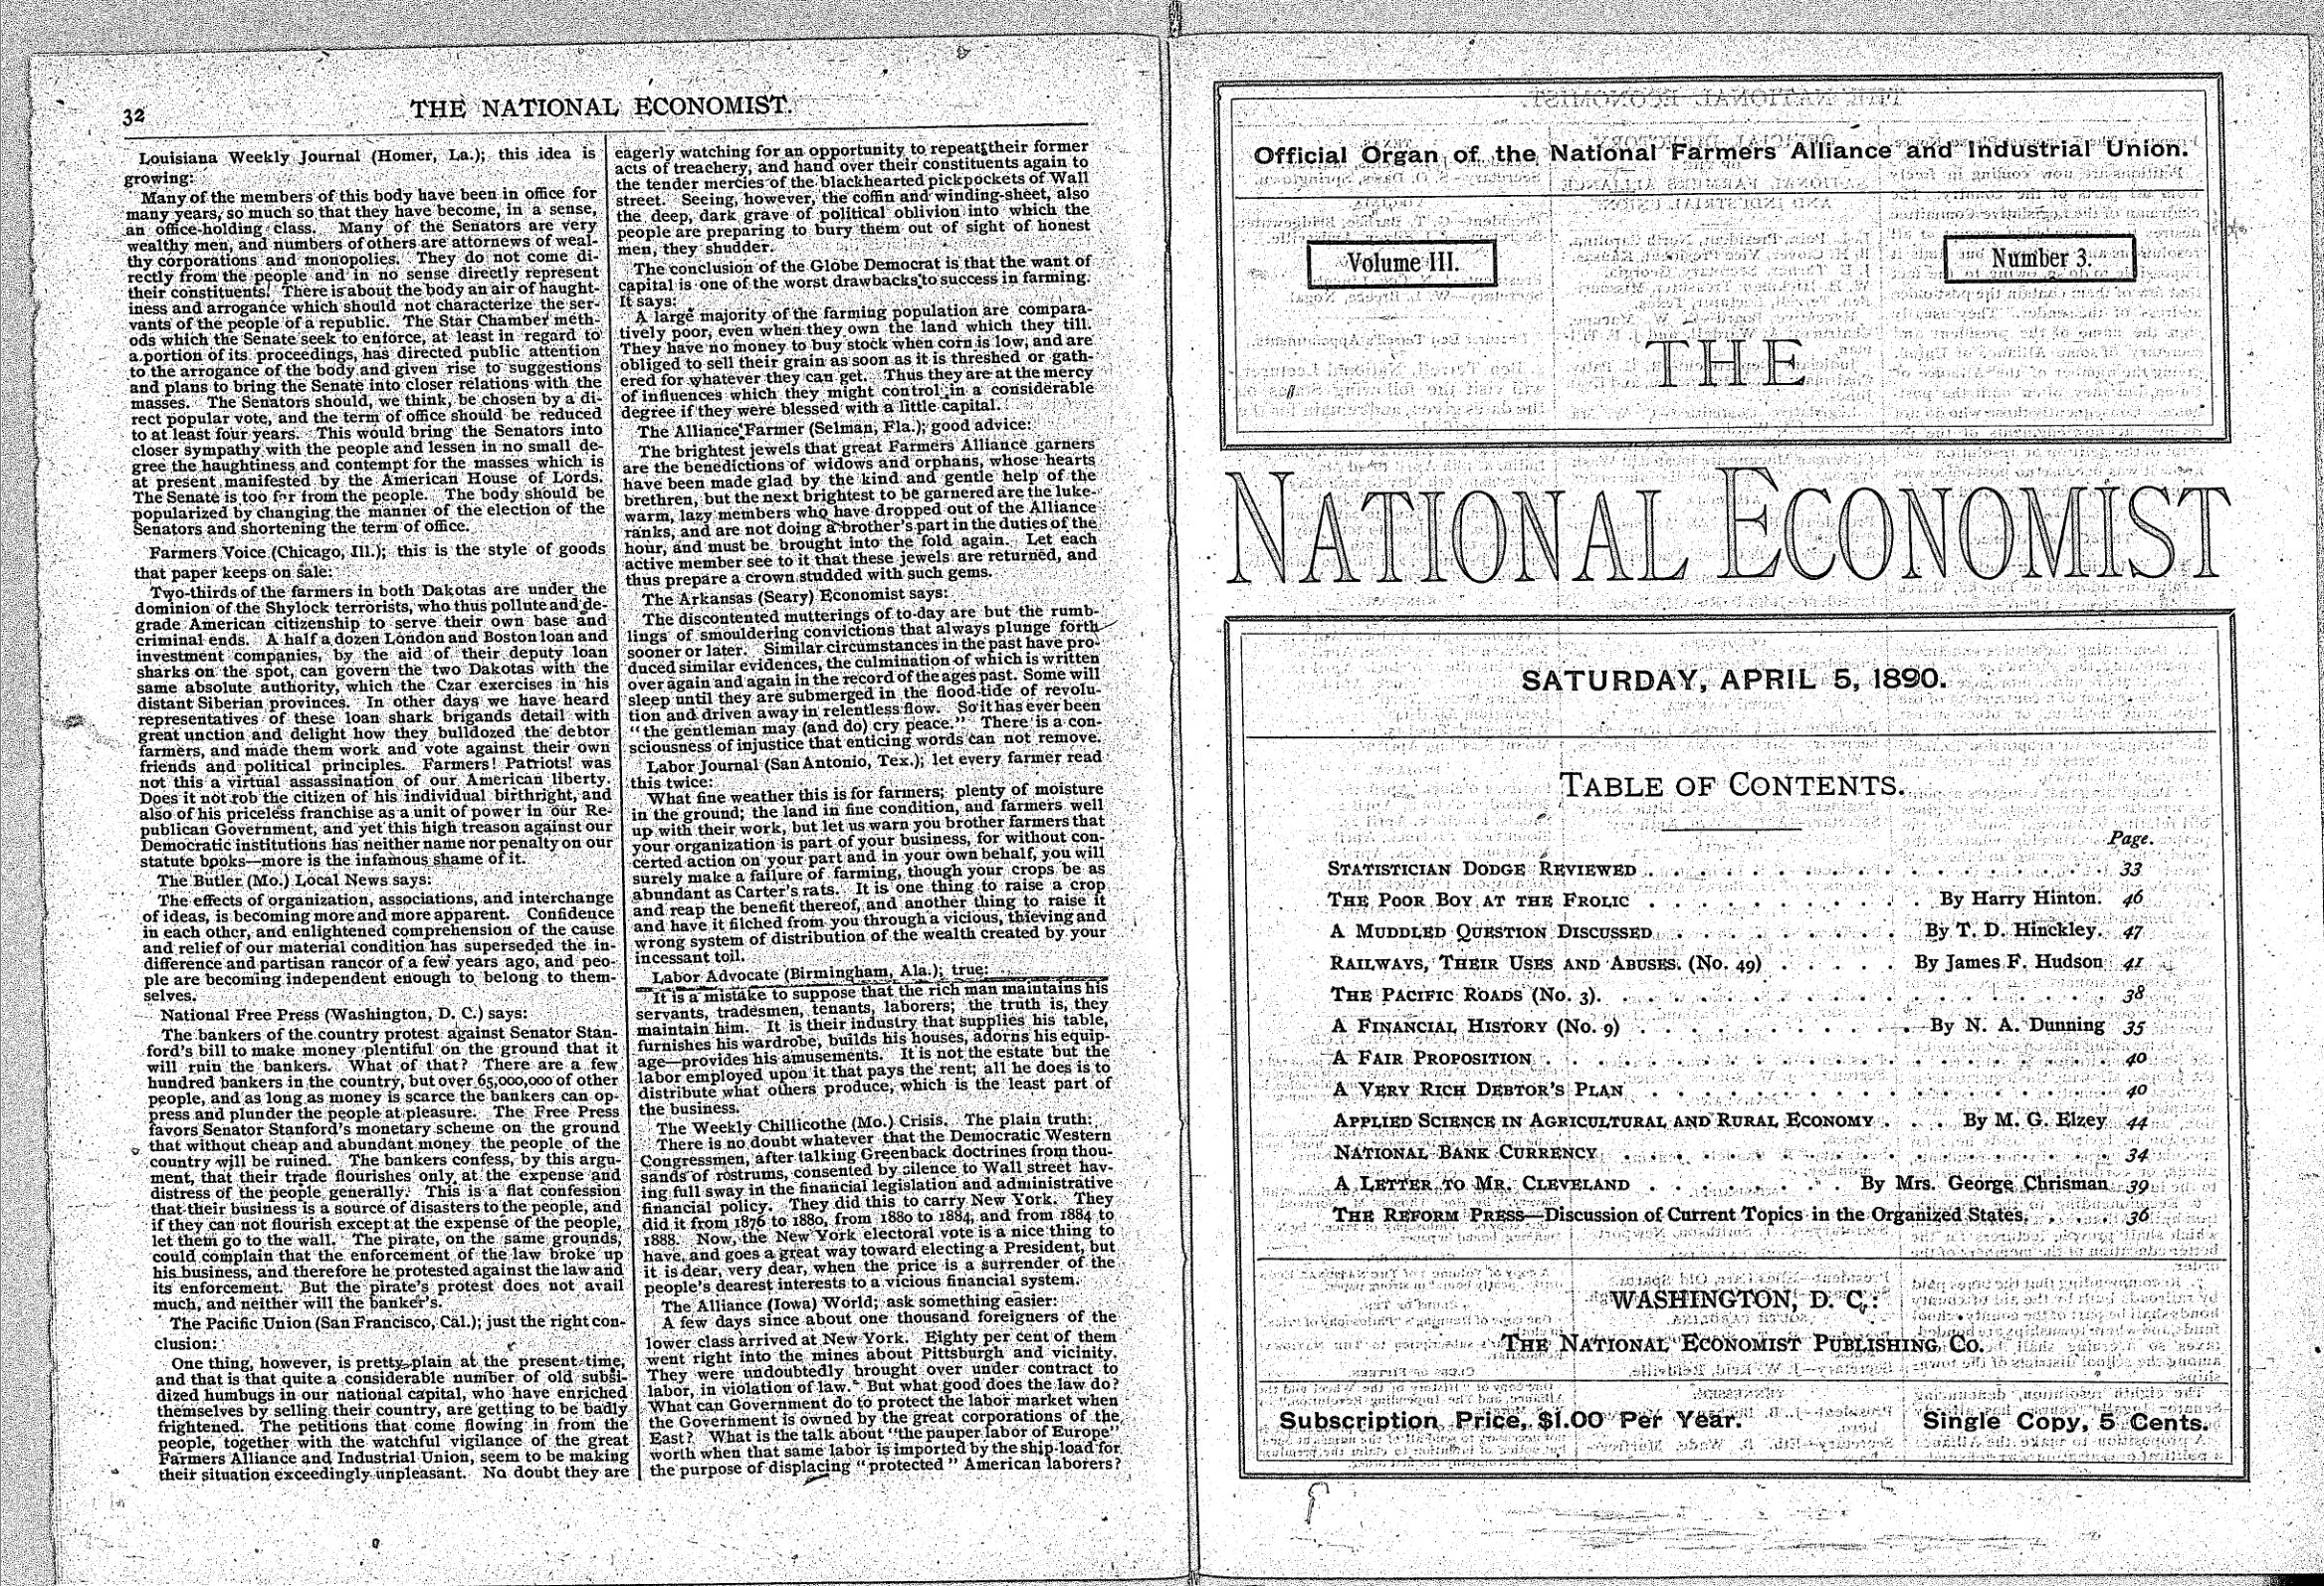

In [ ]:
# Show the image
Image(input_image_path)

In [22]:
# Find type of noise and apply appropriate filter
gaussian_flag, impulse_flag = NoiseTypeDetector(input_image).flag()

if gaussian_flag == 1:
    print('Gaussian Noise Detected')
    output = NoiseReductionApply(input_image).paper_algo_gaussian_removal()
    print(gaussian_flag)
elif impulse_flag == 1:
    print('Impulse Noise Detected')
    output = NoiseReductionApply(input_image).median_blur()
    print(impulse_flag)
else:
    output = input_image
    print('No Noise Detected')

No Noise Detected


In [27]:
# This will remove the watermark
image_without_watermark = WatermarkRemoval(input_image_path).output()

In [28]:
# Save the image
cv2.imwrite('output.png', image_without_watermark)

True

In [23]:
# Save the image
cv2.imwrite('output.png', output)

True

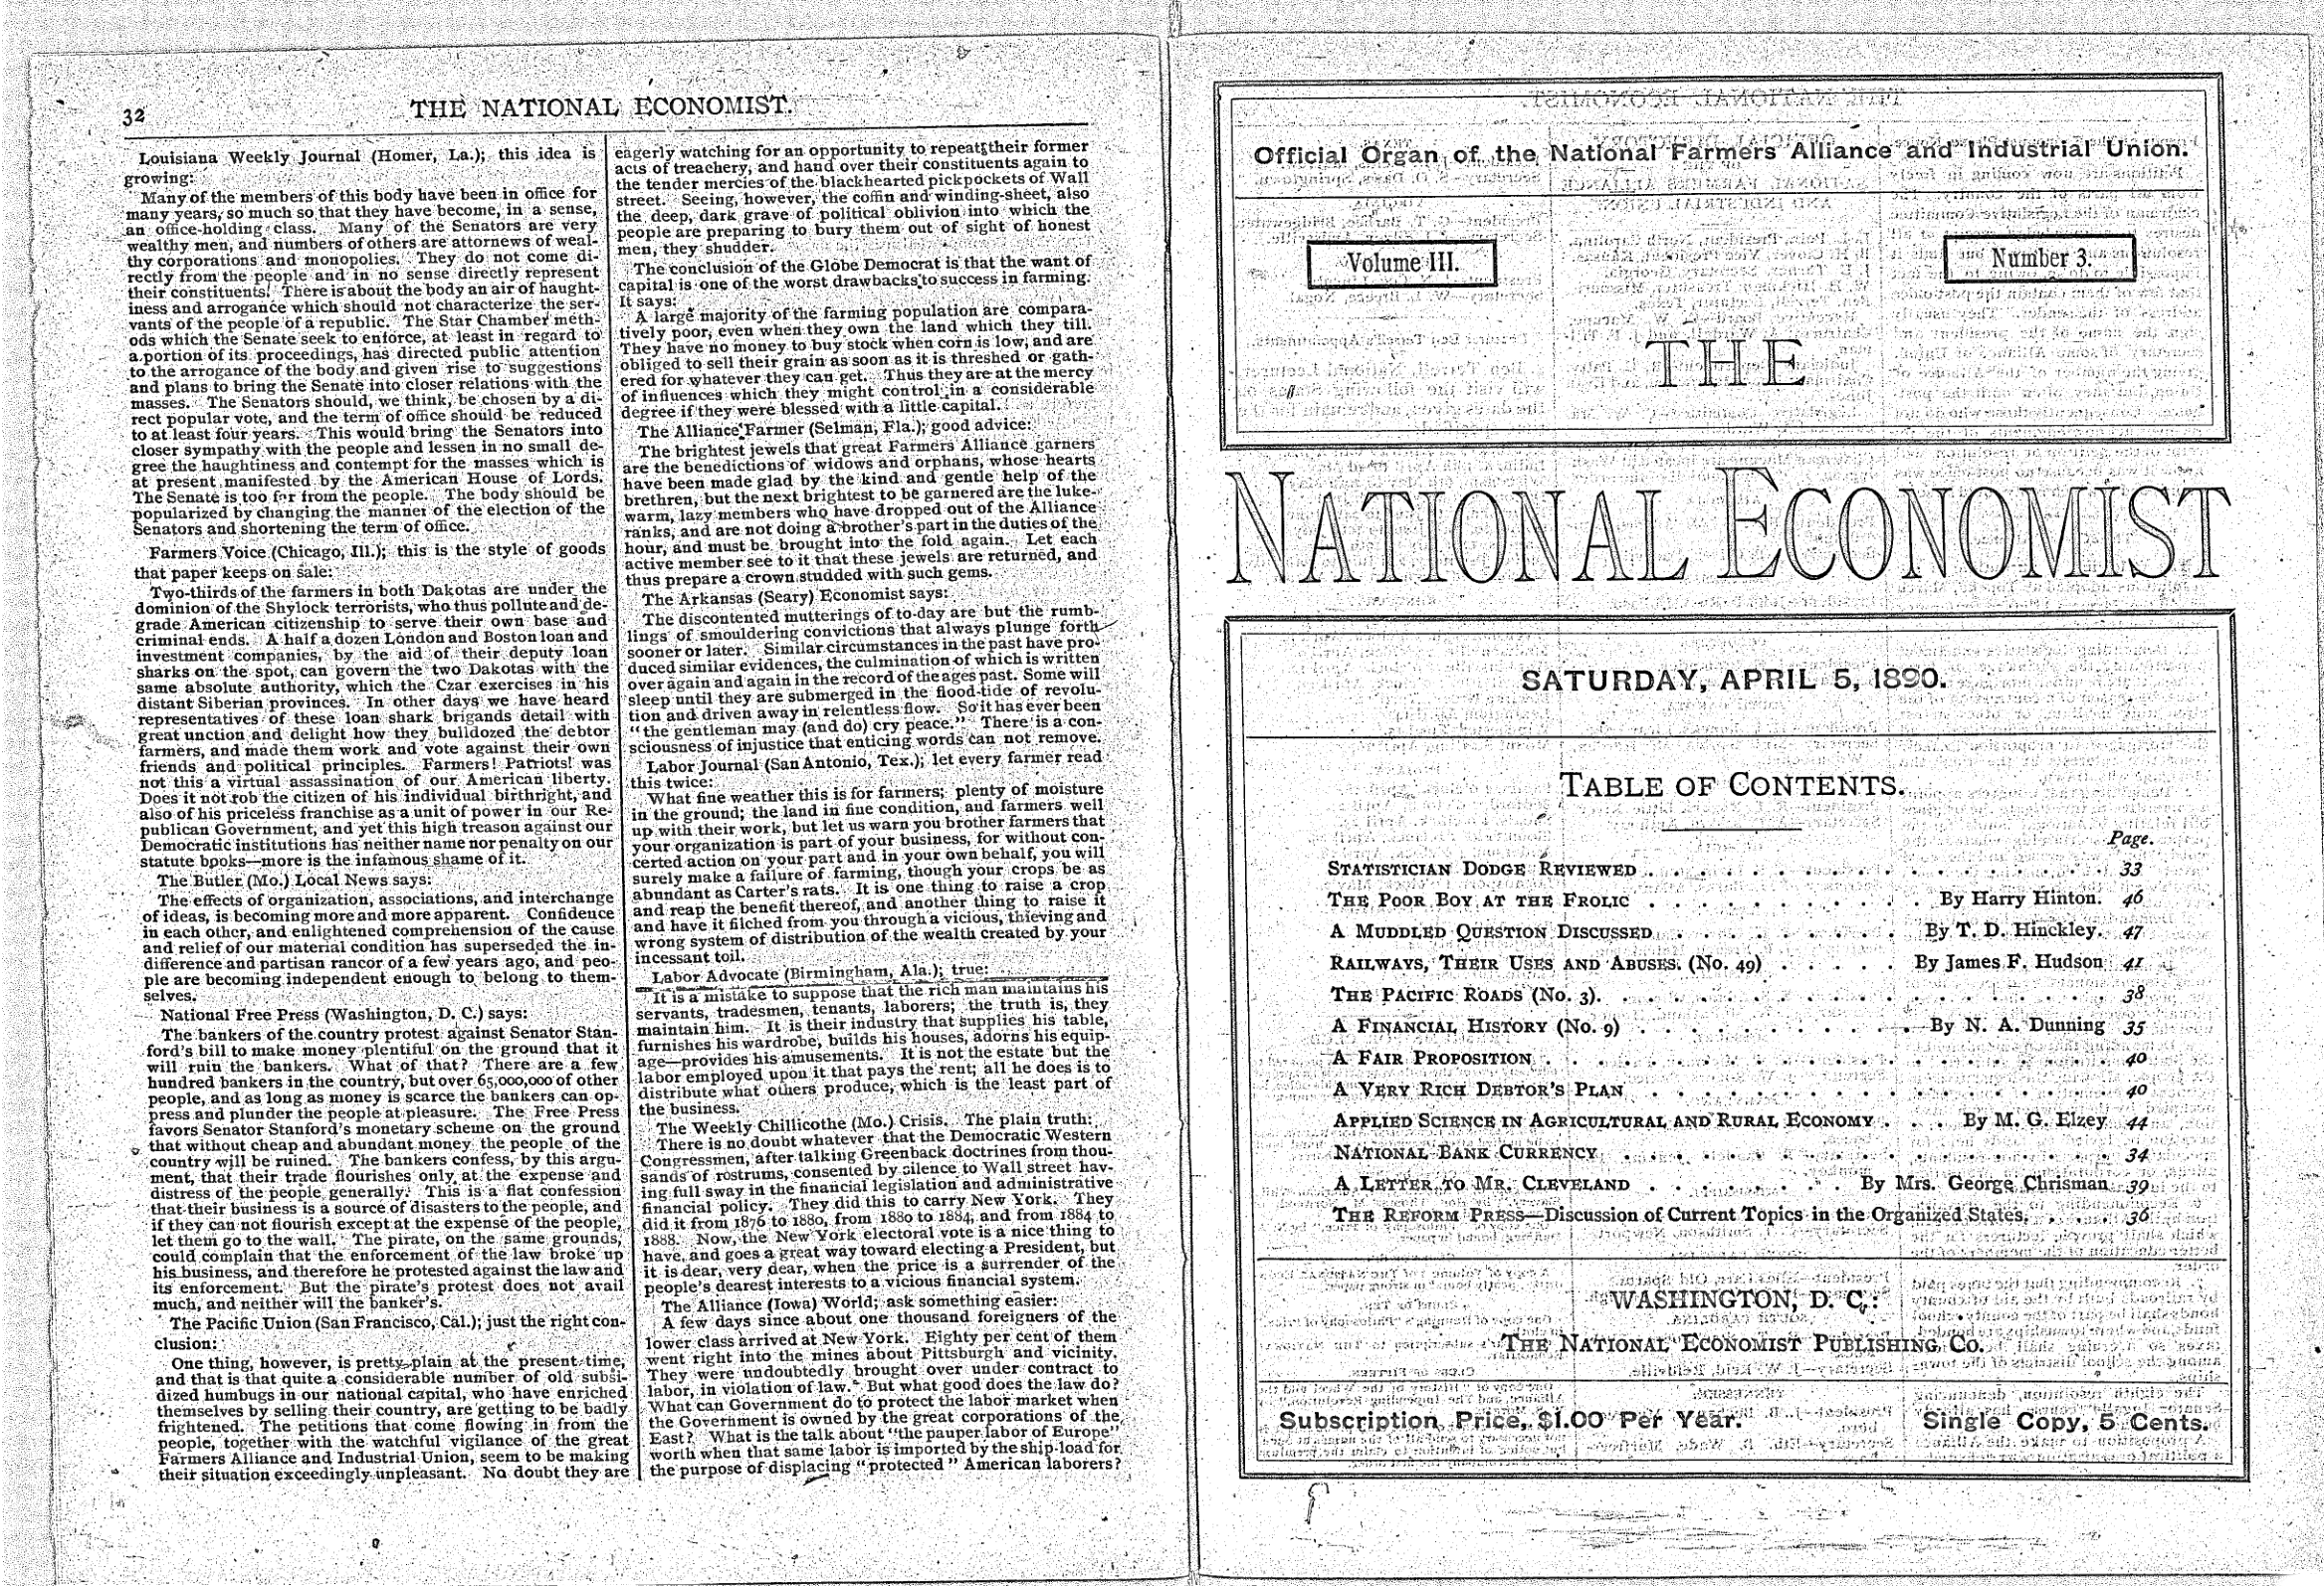

In [29]:
# Show the output
Image('output.png')

In [ ]:
# Delete the Output.png file
os.remove('Output.png')